# TP Cars

Sources et data : 
https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

L'objectif de ce TP est de travailler sur un "Dataset" un peu plus gros et de regarder un problème de régression et non plus de Calssification.

## Analyser les données

Quelles sont les données manquantes quel choix faites vous des différentes variables proposées.

Faire un encodage des variables qualitative.

Tracer la matrice de corélation de vos variables.

Que pouvez vous dire a priori de vos données.

In [1]:
# Import the data
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

# Load data
filenames =["audi","bmw","cclass","focus","ford","hyundi","merc","skoda","toyota","unclean cclass","unclean focus","vauxhall","vw"]

data = {}

for i in filenames :
    data[i] = pd.read_csv(i+".xls", header=None)

In [2]:
vw = data['vw']   #data[vw]
print(vw.shape)
print(vw.head())

(15158, 9)
        0     1      2             3        4         5    6     7           8
0   model  year  price  transmission  mileage  fuelType  tax   mpg  engineSize
1   T-Roc  2019  25000     Automatic    13904    Diesel  145  49.6         2.0
2   T-Roc  2019  26883     Automatic     4562    Diesel  145  49.6         2.0
3   T-Roc  2019  20000        Manual     7414    Diesel  145  50.4         2.0
4   T-Roc  2019  33492     Automatic     4825    Petrol  145  32.5         2.0


In [3]:
print(vw.describe)

<bound method NDFrame.describe of             0     1      2             3        4         5    6     7  \
0       model  year  price  transmission  mileage  fuelType  tax   mpg   
1       T-Roc  2019  25000     Automatic    13904    Diesel  145  49.6   
2       T-Roc  2019  26883     Automatic     4562    Diesel  145  49.6   
3       T-Roc  2019  20000        Manual     7414    Diesel  145  50.4   
4       T-Roc  2019  33492     Automatic     4825    Petrol  145  32.5   
...       ...   ...    ...           ...      ...       ...  ...   ...   
15153     Eos  2012   5990        Manual    74000    Diesel  125  58.9   
15154     Fox  2008   1799        Manual    88102    Petrol  145  46.3   
15155     Fox  2009   1590        Manual    70000    Petrol  200  42.0   
15156     Fox  2006   1250        Manual    82704    Petrol  150  46.3   
15157     Fox  2007   2295        Manual    74000    Petrol  145  46.3   

                8  
0      engineSize  
1             2.0  
2             2.0

In [4]:
vw.info

<bound method DataFrame.info of             0     1      2             3        4         5    6     7  \
0       model  year  price  transmission  mileage  fuelType  tax   mpg   
1       T-Roc  2019  25000     Automatic    13904    Diesel  145  49.6   
2       T-Roc  2019  26883     Automatic     4562    Diesel  145  49.6   
3       T-Roc  2019  20000        Manual     7414    Diesel  145  50.4   
4       T-Roc  2019  33492     Automatic     4825    Petrol  145  32.5   
...       ...   ...    ...           ...      ...       ...  ...   ...   
15153     Eos  2012   5990        Manual    74000    Diesel  125  58.9   
15154     Fox  2008   1799        Manual    88102    Petrol  145  46.3   
15155     Fox  2009   1590        Manual    70000    Petrol  200  42.0   
15156     Fox  2006   1250        Manual    82704    Petrol  150  46.3   
15157     Fox  2007   2295        Manual    74000    Petrol  145  46.3   

                8  
0      engineSize  
1             2.0  
2             2.0  

In [5]:
# vw[1:]  
# vw[:1]
vw.columns = vw.iloc[0]
vw.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object', name=0)

In [6]:
unique_values = {}
for col in vw.columns:
    unique_values[col] = vw[col].unique()

result5 = {"unique_values": {k: unique_values[k] for k in list(unique_values)[:5]}}    
result5

{'unique_values': {'model': array(['model', ' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo',
         ' Tiguan', ' Sharan', ' Up', ' Scirocco', ' Beetle',
         ' Caddy Maxi Life', ' Caravelle', ' Touareg', ' Arteon', ' Touran',
         ' Golf SV', ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta',
         ' CC', ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi',
         ' Eos', ' Fox'], dtype=object),
  'year': array(['year', '2019', '2020', '2018', '2017', '2015', '2016', '2013',
         '2014', '2009', '2010', '2004', '2003', '2012', '2011', '2008',
         '2000', '2006', '2002', '2005', '2007', '2001'], dtype=object),
  'price': array(['price', '25000', '26883', ..., '9949', '1590', '1250'],
        dtype=object),
  'transmission': array(['transmission', 'Automatic', 'Manual', 'Semi-Auto'], dtype=object),
  'mileage': array(['mileage', '13904', '4562', ..., '92640', '88102', '82704'],
        dtype=object)}}

#  Les données manquantes

In [7]:
# Retourner les données manquantes et les valeurs uniques pour les premières colonnes pour examiner
missing_data = vw.isna().sum()
print(f"missing_data: {missing_data}")

missing_data: 0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [8]:
# vw["model"].replace(np.nan,np.nanmedian(vw["model"]),inplace=True)

# Enlever  toutes les données manquantes
vw.columns = vw.iloc[0]  # Set the first row as column headers
vw = vw[1:].copy() # Remove the first row from the dataframe

# Drop columns with any missing data
vw = vw.dropna(axis=1, inplace=True)

# Encodage et corrélation

In [9]:
from sklearn.preprocessing import LabelEncoder
vw = data['vw']

# Conversion des données en DataFrame pour une manipulation plus facile
df = pd.DataFrame(vw)

# Supposer que la première ligne contient les noms des colonnes
df.columns = df.iloc[0]
df = df[1:]

# LabelEncoder pour transformer les variables catégorielles
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # Encoder seulement les colonnes de type objet (catégorielles)
        df[column] = encoder.fit_transform(df[column])

# Convertir les colonnes en numérique
df = df.apply(pd.to_numeric)

# Calcul de la corrélation
correlation = df.corr()

# Afficher la corrélation avec la colonne 'price' comme exemple de variable cible
correlation_price = correlation['price'].sort_values(ascending=False)

correlation_price

0
price           1.000000
model           0.169099
mileage         0.105879
engineSize      0.046433
fuelType        0.003821
transmission   -0.022997
tax            -0.026918
year           -0.090350
mpg            -0.164560
Name: price, dtype: float64

<Axes: xlabel='0', ylabel='0'>

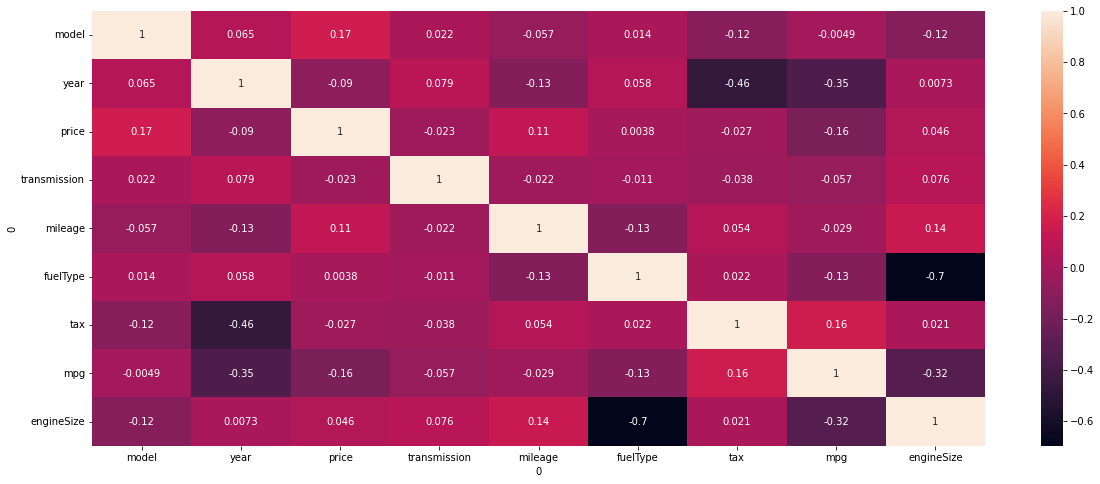

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=df.corr(method="pearson")
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot= True)

In [11]:
corr

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,,,,,,,,,
model,1.000000,0.064749,0.169099,0.021625,-0.056772,0.014208,-0.119198,-0.004872,-0.122617
year,0.064749,1.000000,-0.090350,0.078827,-0.130377,0.058071,-0.459342,-0.349147,0.007337
price,0.169099,-0.090350,1.000000,-0.022997,0.105879,0.003821,-0.026918,-0.164560,0.046433
transmission,0.021625,0.078827,-0.022997,1.000000,-0.021980,-0.011222,-0.037592,-0.056601,0.076025
mileage,-0.056772,-0.130377,0.105879,-0.021980,1.000000,-0.129122,0.053940,-0.028851,0.143557
fuelType,0.014208,0.058071,0.003821,-0.011222,-0.129122,1.000000,0.022011,-0.130852,-0.696649
tax,-0.119198,-0.459342,-0.026918,-0.037592,0.053940,0.022011,1.000000,0.161327,0.020960
mpg,-0.004872,-0.349147,-0.164560,-0.056601,-0.028851,-0.130852,0.161327,1.000000,-0.316453
engineSize,-0.122617,0.007337,0.046433,0.076025,0.143557,-0.696649,0.020960,-0.316453,1.000000


## Modèle de régression

Mettre en place un réseau de neurone qui prédit l'estimation du prix de la voiture. On pourra utiliser la fonction Loss de type moindre carré et également une métrique $R^2$ pour obtenir le score du modèle.

Mettre en place une stratégie pour garantir de ne pas faire de surapprentissage.

Analyser vos résultats, tracer la courbe de points de coordonné (Prix de l'annonce, Prix prédit) et possiblement par sous catégories.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Splitting features and target variables
y = df.iloc[:, 2]  # Use the third column as the target variable
X = df.iloc[:, 1:]  # Use columns from the second one onwards as features

# Data preprocessing
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(1))  # Assuming your task is regression and you have only one output node

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Assuming you're doing regression and using mean squared error as the loss function

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=200, callbacks=[early_stopping], verbose=0)

In [43]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
score_r2 = r2_score(y_test, y_pred)
print("Score R^2:", score_r2)

Score R^2: 0.9999935343913787


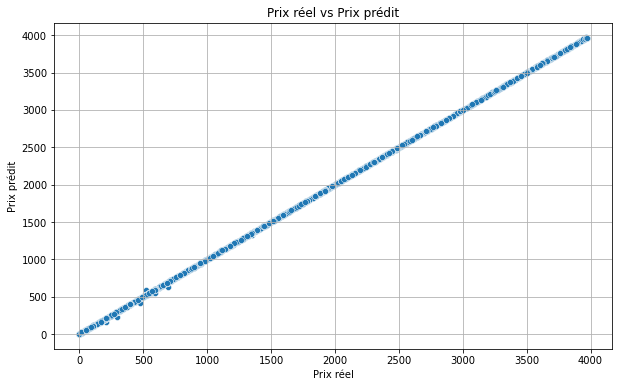

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer les prix réels vs prédits
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred[:, 0])  # Ajuster les indices selon la forme de y_pred
plt.xlabel('Prix réel')   #Actual Price
plt.ylabel('Prix prédit')  #Predicted Price
plt.title('Prix réel vs Prix prédit')
plt.grid(True) 
plt.show()

In [60]:
scores = model.evaluate(x_test,y_test);
accuracy = scores
accuracy

95/95 [==============================] - 0s 2ms/step - loss: 9.2182


9.218192100524902